In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
def plot_board(obstacle, target, beliefState, agent,max_x, max_y, min_x,min_y,):
  N = max(max_x, max_y)
  fig, ax = plt.subplots(figsize = (max_x - min_x,max_y- min_y))
  ax.xaxis.set_ticks_position('top')   #将X坐标轴移到上面
  ax.invert_yaxis()  
  
  x = [i for i in range(N)]
  y = [i for i in range(N)]
  
  ax.set_ylim(bottom=N, top=0)  # 此处将原点设置为左上角  
  plt.xticks([0.5 + i for i in range(N )], labels = [str(i) for i in range(N)])
  plt.yticks([0.5 + i for i in range(N)], labels = [str(i) for i in range(N)])
  plt.xlabel('X Axis')
  plt.ylabel('Y Axis')
  width = 1
  height =1 

  for left, bottom in obstacle:
    rect = plt.Rectangle((left, bottom), width, height, facecolor="black", alpha = 0.5)
    ax.add_patch(rect)

  for left, bottom in beliefState:
    rect = plt.Rectangle((left, bottom), width, height, facecolor="blue", alpha = 0.5)
    ax.add_patch(rect)

  for left, bottom in target:
    rect = plt.Rectangle((left, bottom), width, height, facecolor="green", alpha = 0.5)
    ax.add_patch(rect)

  #plt.scatter(agent[0] + 0.5, agent[1] +0.5)
  for i in range(N):
    plt.hlines(i, 0, N , alpha = 0.5)
    plt.vlines(i, 0, N , alpha = 0.5)
  plt.grid(False)
  plt.xlim((min_x,max_x))
  plt.ylim((max_y,min_y))
  plt.show()

def move(belief, action):
  result = set()
  for x, y in belief:
    for slip in [1, 2]:
      if action == "west":
        nx, ny = max(0, x - slip) , y
      if action == 'east':
        nx, ny = min(N - 1, x + slip), y
      if action == 'north':
        nx, ny = x, max(0, y - slip)
      if action == 'south':
        nx, ny = x, min(N - 1, y + slip)
      result.add((nx, ny))
  return list(result)

def move2(belief, action):
  result = set()
  for x, y in belief:
    for slip in [1, 0]:
      if action == "west":
        nx, ny = max(0, x - slip) , y
      if action == 'east':
        nx, ny = min(N - 1, x + slip), y
      if action == 'north':
        nx, ny = x, max(0, y - slip)
      if action == 'south':
        nx, ny = x, min(N - 1, y + slip)
      result.add((nx, ny))
  return list(result)

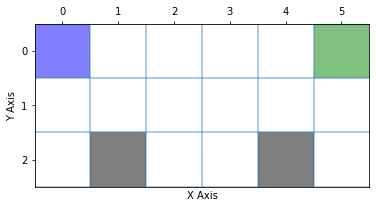

In [8]:
obstacle = [(1,2),(4,2)]
belief_initial = [(0,0)]
target = [(5,0)]
max_x, max_y = 6, 3
min_x, min_y = 0, 0
agent= (0,0)
plot_board(obstacle, target, belief_initial, agent, max_x, max_y, min_x, min_y)

# concrete model

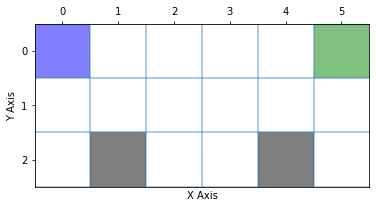

In [3]:
obstacle = [(1,2),(4,2)]
belief_initial = [(0,0)]
target = [(5,0)]
max_x, max_y = 6, 3
min_x, min_y = 0, 0
agent= (0,0)
plot_board(obstacle, target, belief_initial, agent, max_x, max_y, min_x, min_y)

# local shield 1

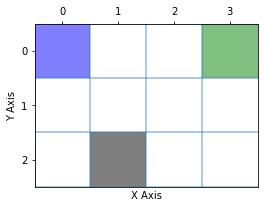

In [4]:
belief = belief_initial
max_x, max_y = 4, 3
min_x, min_y = 0, 0
plot_board(obstacle, [(3,0)], belief, agent, max_x, max_y, min_x, min_y)

# local shield 2

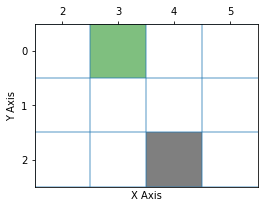

In [5]:
belief = belief_initial
max_x, max_y = 6, 3
min_x, min_y = 2, 0
plot_board(obstacle, [(3,0)], belief, agent, max_x, max_y, min_x, min_y)

 # simulation

 

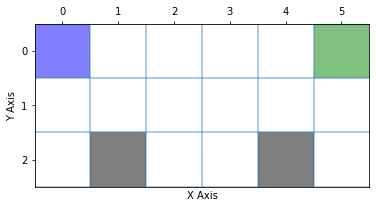

----action taken: east ----


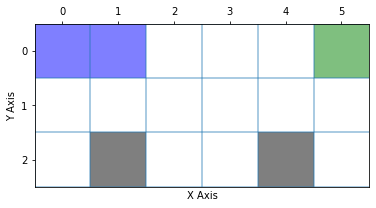

----action taken: east ----


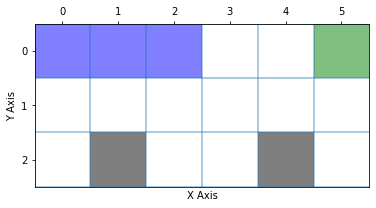

----action taken: east ----


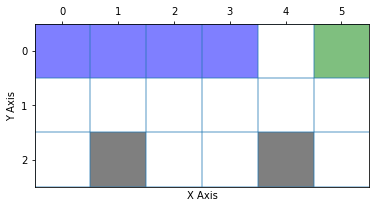

----action taken: east ----


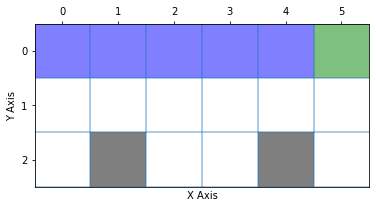

In [6]:
#obstacle = [(1, 0), (5, 1),  (2, 4), (4, 4), (5,4), (5,5)]
belief = belief_initial
N = 6
plot_board(obstacle, target, belief, agent, max_x, max_y, 0,0)

s, w, e, n = 'south', 'west', 'east', 'north'
for action in [e,e,e,e]:
  belief = move2(belief, action)
  print("----action taken:", action,"----")
  plot_board(obstacle, target, belief, agent, max_x, max_y, 0,0)


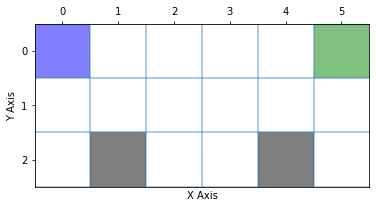

----action taken: east ----


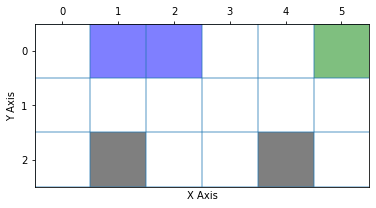

----action taken: east ----


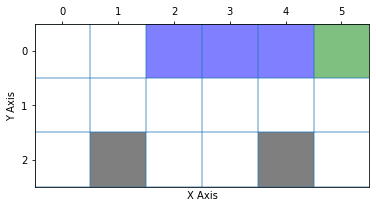

----action taken: east ----


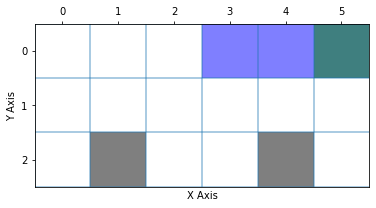

----action taken: east ----


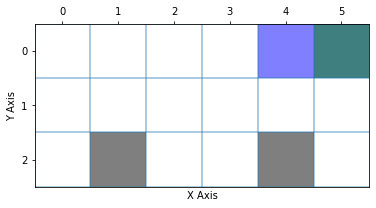

In [7]:
#obstacle = [(1, 0), (5, 1),  (2, 4), (4, 4), (5,4), (5,5)]
belief = belief_initial
N = 6
plot_board(obstacle, target, belief, agent, max_x, max_y, 0,0)

s, w, e, n = 'south', 'west', 'east', 'north'
for action in [e,e,e,e]:
  belief = move(belief, action)
  print("----action taken:", action,"----")
  plot_board(obstacle, target, belief, agent, max_x, max_y, 0,0)
